## Building Markov transition matrix

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# input dna sequence
s = "ATCGGCTTAGCGTACGTAGCTAGCTTGACCGATAGCGTAGCTAGCATCGATCGATCGTACGATCGTA"

# initialize transition freq
nts = ['A', 'C', 'G', 'T']
freq = {a: {b: 0 for b in nts} for a in nts}

# count transitions
for i in range(len(s) - 1):
    a = s[i]
    b = s[i + 1]
    if a in nts and b in nts:
        freq[a][b] += 1
    else:
        print(f"invalid nucleotide: {a} or {b}")

# normalize to get probabilities
mat = {a: {} for a in nts}
for a in nts:
    tot = sum(freq[a].values())
    for b in nts:
        mat[a][b] = freq[a][b] / tot if tot > 0 else 0.0

# print transition matrix
df = pd.DataFrame(mat)
print("transition matrix:")
print(df)


transition matrix:
     A       C         G         T
A  0.0  0.0625  0.277778  0.529412
C  0.2  0.0625  0.388889  0.294118
G  0.4  0.6250  0.055556  0.058824
T  0.4  0.2500  0.277778  0.117647


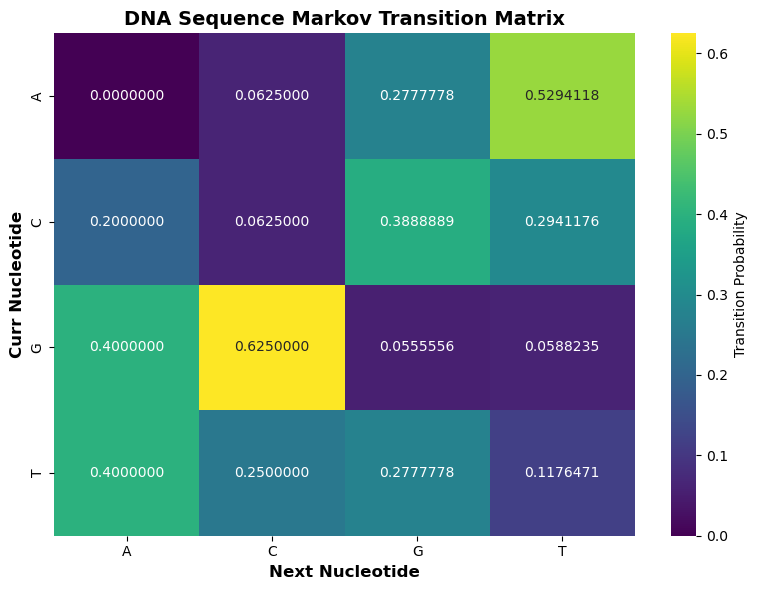

In [2]:
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt=".7f", cmap="viridis", cbar_kws={"label": "Transition Probability"})
plt.xlabel("Next Nucleotide",  fontsize=12, fontweight="bold")
plt.ylabel("Curr Nucleotide", fontsize=12, fontweight="bold")
plt.title("DNA Sequence Markov Transition Matrix", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [6]:
total = len(s) - 1
# compute frequencies from transition frequency
FREQ_PAIRS = {
    f"{i}{j}": freq[i][j] / total
    for i in nts
    for j in nts
}

pairs = sorted(FREQ_PAIRS.keys())
freqs = [FREQ_PAIRS[p] for p in pairs]

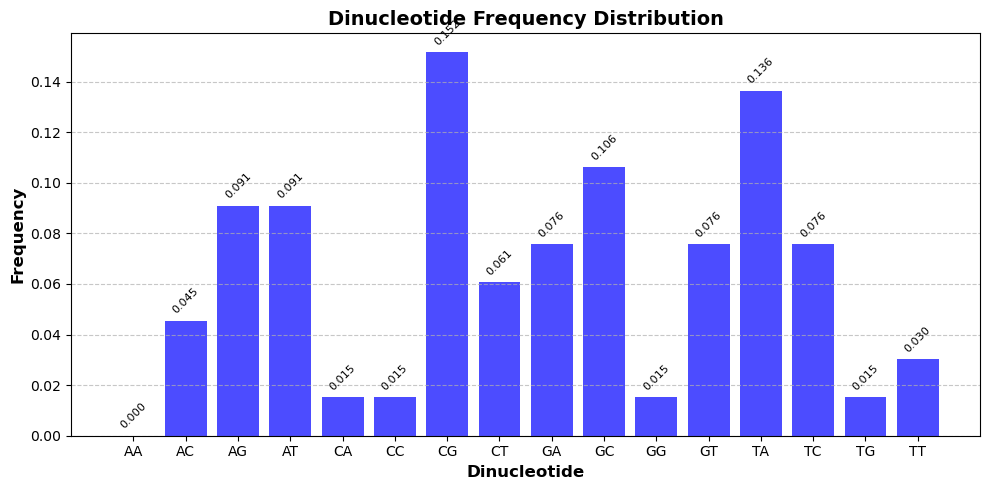

In [7]:
plt.figure(figsize=(10, 5))
bars = plt.bar(pairs, freqs, color="blue", alpha=0.7)
plt.xlabel("Dinucleotide", fontsize=12, fontweight="bold")
plt.ylabel("Frequency",    fontsize=12, fontweight="bold")
plt.title("Dinucleotide Frequency Distribution", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate each bar with its value
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.002, f"{h:.3f}", ha="center", va="bottom", rotation=45, fontsize=8)

plt.tight_layout()
plt.show()